In [2]:
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [3]:
# Prepare data for XG Boost


# For a given wellpad....

# how old is it in days? t = 1, day old pad, t=100 pad hundred days old
# what has already happened to it? events, flaring
# what is going to happen in the future? future flaring...


In [4]:
df = pd.read_csv('original_dataset_merged_RNN.csv')

columns = ['wellpad_code','area_m2','wells','parent_operator_co','lat','long', 'state', 'basin', 'subbasin', 'county', 'company_type',
           'tst_first_detection_date', 'tst_permit_date', 'tst_permit_published_date', 'tst_spud_date', 
           'tst_completion_date', 'tst_fracfocus_jobstart_date', 'tst_fracfocus_jobend_date',
           'wellpad_vintage_year', 'aq_date', 'power','BRIGHTNESS','days_diffs','temporal_group','pad_status']

df1 = df[columns].copy()

def is_correct_dt(dt_str):
    
    try:
        dt = datetime.strptime(dt_str, '%Y/%m/%d')
    except:
        dt = np.nan
    
    return dt
    
df1['tst_first_detection_date'] = df1['tst_first_detection_date'].apply(is_correct_dt)


C:\Users\Shihao Zhou\AppData\Local\Temp\ipykernel_40156\1637831693.py:1: DtypeWarning: Columns (29,30,42,44,45,46,47,50,52,56,58,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('original_dataset_merged_RNN.csv')


In [5]:
df1['aq_date'] = pd.to_datetime(df1['aq_date'], format='%Y%m%d %H:%M')
df1['tst_first_detection_date'] = pd.to_datetime(df1['tst_first_detection_date'], format='%Y/%m/%d')
df1['tst_permit_date'] = pd.to_datetime(df1['tst_permit_date'], format='%Y/%m/%d')
df1['tst_permit_published_date'] = pd.to_datetime(df1['tst_permit_published_date'], format='%Y/%m/%d')
df1['tst_spud_date'] = pd.to_datetime(df1['tst_spud_date'], format='%Y/%m/%d')
df1['tst_completion_date'] = pd.to_datetime(df1['tst_completion_date'], format='%Y/%m/%d')
df1['tst_fracfocus_jobstart_date'] = pd.to_datetime(df1['tst_fracfocus_jobstart_date'], format='%Y/%m/%d')
df1['tst_fracfocus_jobend_date'] = pd.to_datetime(df1['tst_fracfocus_jobend_date'], format='%Y/%m/%d')
df1['tst_fracfocus_jobend_date'] = pd.to_datetime(df1['tst_fracfocus_jobend_date'], format='%Y/%m/%d')


In [6]:
df1

,wellpad_code,area_m2,wells,parent_operator_co,lat,long,state,basin,subbasin,county,...,tst_completion_date,tst_fracfocus_jobstart_date,tst_fracfocus_jobend_date,wellpad_vintage_year,aq_date,power,BRIGHTNESS,days_diffs,temporal_group,pad_status
0,9txqyd3v,20400.651830,3.0,CROWNQUEST OPERATING,32.1372,-102.0163,Texas,Permian,Midland,Martin,...,2019-04-28,2019-03-21 00:00:00,2019-04-11 00:00:00,2018,2019-07-03 07:42:00,2.53,302.01,68.0,1.0,6
1,9txqydx8,35254.991310,3.0,CROWNQUEST OPERATING,32.1379,-102.0083,Texas,Permian,Midland,Martin,...,2022-02-09,2022-01-04 18:33:00,2022-01-17 03:08:00,2021,2022-04-04 07:31:00,1.62,303.60,910.0,3.0,6
2,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2022-02-09,2021-12-15 06:00:00,2021-12-31 06:00:00,2020,2022-04-04 08:22:00,1.78,315.40,0.0,3.0,6
3,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2022-02-09,2021-12-15 06:00:00,2021-12-31 06:00:00,2020,2022-04-04 09:13:00,0.79,297.20,0.0,3.0,6
4,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2022-02-09,2021-12-15 06:00:00,2021-12-31 06:00:00,2020,2022-04-06 19:04:00,5.49,367.00,2.0,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154112,9tz7mnen,14609.213250,1.0,SMITH ENERGY OPERATING,32.9518,-102.0808,Texas,Permian,Midland,Dawson,...,2022-06-10,2022-05-25 11:01:00,2022-05-25 11:50:00,2022,NaT,NaN,NaN,NaN,NaN,6
154113,9trx874v,7889.643735,1.0,KINDER MORGAN,30.8672,-101.9379,Texas,Permian,NaN,Pecos,...,2022-03-11,NaT,NaT,2022,NaT,NaN,NaN,NaN,NaN,4
154114,9trx86q0,6531.521689,1.0,KINDER MORGAN,30.8622,-101.9335,Texas,Permian,NaN,Pecos,...,2022-03-22,NaT,NaT,2022,NaT,NaN,NaN,NaN,NaN,4
154115,9twm9n10,19650.933560,1.0,NGL ENERGY,31.9369,-103.6653,Texas,Permian,Delaware,Loving,...,2022-06-28,NaT,NaT,2022,NaT,NaN,NaN,NaN,NaN,4


In [7]:
def public_private_class(company_type):
    
    ctype_class = 0
    if company_type == 'Public':
        ctype_class = 1
        
    return ctype_class

df1['company_type'] = df1['company_type'].apply(public_private_class)

In [8]:
# Find minimum date
sub_df = df1[['tst_first_detection_date', 'tst_permit_date','tst_permit_published_date','tst_spud_date','tst_completion_date','tst_fracfocus_jobstart_date',
             'tst_fracfocus_jobend_date']].copy()
sub_df['t0'] = sub_df.min(axis = 1)
df1['t0'] = sub_df['t0']

# Find mminimum date

sub_df = df1[['tst_first_detection_date', 'tst_permit_date','tst_permit_published_date','tst_spud_date','tst_completion_date','tst_fracfocus_jobstart_date',
             'tst_fracfocus_jobend_date', 'aq_date']].copy()
sub_df['tmax'] = sub_df.max(axis = 1)

df1['tmax'] = sub_df['tmax']


In [9]:
df1

,wellpad_code,area_m2,wells,parent_operator_co,lat,long,state,basin,subbasin,county,...,tst_fracfocus_jobend_date,wellpad_vintage_year,aq_date,power,BRIGHTNESS,days_diffs,temporal_group,pad_status,t0,tmax
0,9txqyd3v,20400.651830,3.0,CROWNQUEST OPERATING,32.1372,-102.0163,Texas,Permian,Midland,Martin,...,2019-04-11 00:00:00,2018,2019-07-03 07:42:00,2.53,302.01,68.0,1.0,6,2018-05-06,2019-07-03 07:42:00
1,9txqydx8,35254.991310,3.0,CROWNQUEST OPERATING,32.1379,-102.0083,Texas,Permian,Midland,Martin,...,2022-01-17 03:08:00,2021,2022-04-04 07:31:00,1.62,303.60,910.0,3.0,6,2020-09-17,2022-04-04 07:31:00
2,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2021-12-31 06:00:00,2020,2022-04-04 08:22:00,1.78,315.40,0.0,3.0,6,2020-08-13,2022-04-04 08:22:00
3,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2021-12-31 06:00:00,2020,2022-04-04 09:13:00,0.79,297.20,0.0,3.0,6,2020-08-13,2022-04-04 09:13:00
4,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2021-12-31 06:00:00,2020,2022-04-06 19:04:00,5.49,367.00,2.0,3.0,6,2020-08-13,2022-04-06 19:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154112,9tz7mnen,14609.213250,1.0,SMITH ENERGY OPERATING,32.9518,-102.0808,Texas,Permian,Midland,Dawson,...,2022-05-25 11:50:00,2022,NaT,NaN,NaN,NaN,NaN,6,2022-02-07,2022-06-10 00:00:00
154113,9trx874v,7889.643735,1.0,KINDER MORGAN,30.8672,-101.9379,Texas,Permian,NaN,Pecos,...,NaT,2022,NaT,NaN,NaN,NaN,NaN,4,2021-12-15,2022-03-11 00:00:00
154114,9trx86q0,6531.521689,1.0,KINDER MORGAN,30.8622,-101.9335,Texas,Permian,NaN,Pecos,...,NaT,2022,NaT,NaN,NaN,NaN,NaN,4,2021-12-21,2022-03-22 00:00:00
154115,9twm9n10,19650.933560,1.0,NGL ENERGY,31.9369,-103.6653,Texas,Permian,Delaware,Loving,...,NaT,2022,NaT,NaN,NaN,NaN,NaN,4,2021-12-07,2022-06-28 00:00:00


In [10]:
# Convert everything to standard dates

df1['aq_date'] = pd.to_datetime(df1['aq_date']).dt.date
df1['tst_first_detection_date'] = pd.to_datetime(df1['tst_first_detection_date']).dt.date
df1['tst_permit_date'] = pd.to_datetime(df1['tst_permit_date']).dt.date
df1['tst_permit_published_date'] = pd.to_datetime(df1['tst_permit_published_date']).dt.date
df1['tst_spud_date'] = pd.to_datetime(df1['tst_spud_date']).dt.date
df1['tst_completion_date'] = pd.to_datetime(df1['tst_completion_date']).dt.date
df1['tst_fracfocus_jobstart_date'] = pd.to_datetime(df1['tst_fracfocus_jobstart_date']).dt.date
df1['tst_fracfocus_jobend_date'] = pd.to_datetime(df1['tst_fracfocus_jobend_date']).dt.date
df1['tst_fracfocus_jobend_date'] = pd.to_datetime(df1['tst_fracfocus_jobend_date']).dt.date
df1['t0'] = pd.to_datetime(df1['t0']).dt.date
df1['tmax'] = pd.to_datetime(df1['tmax']).dt.date


In [11]:
df1

,wellpad_code,area_m2,wells,parent_operator_co,lat,long,state,basin,subbasin,county,...,tst_fracfocus_jobend_date,wellpad_vintage_year,aq_date,power,BRIGHTNESS,days_diffs,temporal_group,pad_status,t0,tmax
0,9txqyd3v,20400.651830,3.0,CROWNQUEST OPERATING,32.1372,-102.0163,Texas,Permian,Midland,Martin,...,2019-04-11,2018,2019-07-03,2.53,302.01,68.0,1.0,6,2018-05-06,2019-07-03
1,9txqydx8,35254.991310,3.0,CROWNQUEST OPERATING,32.1379,-102.0083,Texas,Permian,Midland,Martin,...,2022-01-17,2021,2022-04-04,1.62,303.60,910.0,3.0,6,2020-09-17,2022-04-04
2,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2021-12-31,2020,2022-04-04,1.78,315.40,0.0,3.0,6,2020-08-13,2022-04-04
3,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2021-12-31,2020,2022-04-04,0.79,297.20,0.0,3.0,6,2020-08-13,2022-04-04
4,9txqyf9e,31574.652690,6.0,CROWNQUEST OPERATING,32.1385,-102.0056,Texas,Permian,Midland,Martin,...,2021-12-31,2020,2022-04-06,5.49,367.00,2.0,3.0,6,2020-08-13,2022-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154112,9tz7mnen,14609.213250,1.0,SMITH ENERGY OPERATING,32.9518,-102.0808,Texas,Permian,Midland,Dawson,...,2022-05-25,2022,NaT,NaN,NaN,NaN,NaN,6,2022-02-07,2022-06-10
154113,9trx874v,7889.643735,1.0,KINDER MORGAN,30.8672,-101.9379,Texas,Permian,NaN,Pecos,...,NaT,2022,NaT,NaN,NaN,NaN,NaN,4,2021-12-15,2022-03-11
154114,9trx86q0,6531.521689,1.0,KINDER MORGAN,30.8622,-101.9335,Texas,Permian,NaN,Pecos,...,NaT,2022,NaT,NaN,NaN,NaN,NaN,4,2021-12-21,2022-03-22
154115,9twm9n10,19650.933560,1.0,NGL ENERGY,31.9369,-103.6653,Texas,Permian,Delaware,Loving,...,NaT,2022,NaT,NaN,NaN,NaN,NaN,4,2021-12-07,2022-06-28


C:\Users\Shihao Zhou\AppData\Local\Temp\ipykernel_40156\3801110328.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_tb, dtype=np.bool)


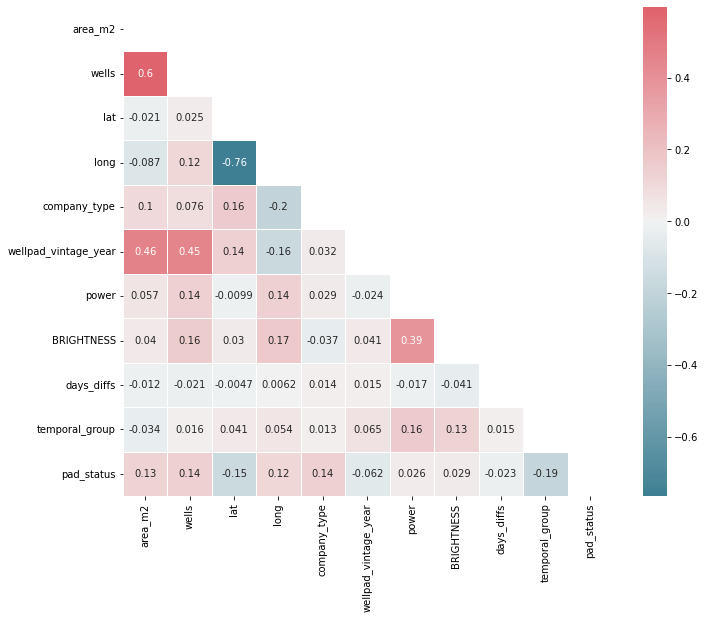

In [12]:
# create correlation table
corr_tb = df1.corr()

# create mask
mask = np.zeros_like(corr_tb, dtype=np.bool)
mask[np.triu_indices_from(mask, k=0)] = True

# generate colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# initialise figure
f, ax = plt.subplots(figsize=(11, 9))

# draw heatmap
sns.heatmap(corr_tb, mask=mask, cmap=cmap, center=0, 
            annot=True, square=True, linewidths=.5) 

# show figure
plt.show()

In [13]:
# Simulate Daily Time series per wellpad

wellpad_groups = df1.groupby('wellpad_code')

In [14]:
def flare_check(rows, todays_date):

    todays_date = todays_date.date()
    
    is_flaring = 0
    flares_n_acc = 0 # Number of flares so far
    flares_power_acc = 0 # Total FRP so far
    flares_power = 0
    temporal_group = np.nan
    #t_until_next_flare = np.nan # Time until next flaring event
    t_since_last_flare = np.nan # Time since last flare event
    #flares_future_n = 0 # Number of flares in the future
    #flares_future_power = 0 # Total FRP in the future
    
    
    rows_today_and_before = rows.loc[rows['aq_date'] <= todays_date] # Get rows today and before
    #rows_future = rows.loc[rows['aq_date'] > todays_date] # Get future rows
    
    
    if len(rows_today_and_before) > 0: # Do we have any flaring data today or before?
        
        flares_n_acc = len(rows_today_and_before)
        flares_power = rows_today_and_before.power.values[0]
        temporal_group = rows_today_and_before.temporal_group.values[0]
        flares_power_acc = rows_today_and_before.power.sum()
        most_recent_flare = rows_today_and_before.sort_values('aq_date', ascending=False).head(1)
        t_since_last_flare = (todays_date-most_recent_flare['aq_date'].values[0]).days
        
        if (todays_date ==  most_recent_flare['aq_date'].values[0]):
            is_flaring = 1
        else:
            flares_power = 0
        
#     if len(rows_future) > 0: # Do we have any flaring data after today?
        
#         flares_future_n = len(rows_future)
#         flares_future_power = rows_future.power.sum()
#         next_flare = rows_future.sort_values('aq_date', ascending=True).head(1)
#         t_until_next_flare = (next_flare['aq_date'].values[0]-todays_date).days


    return flares_n_acc, flares_power,flares_power_acc,t_since_last_flare,is_flaring,temporal_group  #,flares_future_n, flares_future_power,t_until_next_flare
    
    
def spud_check(rows, todays_date):

    # Get first row
    row = rows.head(1)
    
    t_spud_diff = np.nan
    
    spud_date = row['tst_spud_date'].values[0]
    todays_date = todays_date.date()
    
    if spud_date is not pd.NaT:
        if spud_date <= todays_date:

            t_spud_diff = (todays_date-spud_date).days
            
    return t_spud_diff


def completion_check(rows, todays_date):
    
    # Get first row
    row = rows.head(1)
    
    n_completions = 0
    t_comp_diff = np.nan
    
    comp_diffs = []
    
    todays_date = todays_date.date()
    
    tst_completion_date = row['tst_completion_date'].values[0]
     
    if tst_completion_date is not pd.NaT:
        if tst_completion_date <= todays_date:
            
            n_completions+=1
            
            comp_diffs.append((todays_date-tst_completion_date).days)
    
    
    
    tst_fracfocus_jobstart_date = row['tst_fracfocus_jobstart_date'].values[0]
    
    if tst_fracfocus_jobstart_date is not pd.NaT:
        if tst_fracfocus_jobstart_date <= todays_date:
            
            n_completions+=1
            
            comp_diffs.append((todays_date-tst_fracfocus_jobstart_date).days)

            
            
    tst_fracfocus_jobend_date = row['tst_fracfocus_jobend_date'].values[0]
    
    if tst_fracfocus_jobend_date is not pd.NaT:
        if tst_fracfocus_jobend_date <= todays_date:
            
            n_completions+=1
            
            comp_diffs.append((todays_date-tst_fracfocus_jobend_date).days)
      
    
    if len(comp_diffs) > 0:
        t_comp_diff = min(comp_diffs)
        
    return n_completions, t_comp_diff


In [15]:
df1.columns

Index(['wellpad_code', 'area_m2', 'wells', 'parent_operator_co', 'lat', 'long',
       'state', 'basin', 'subbasin', 'county', 'company_type',
       'tst_first_detection_date', 'tst_permit_date',
       'tst_permit_published_date', 'tst_spud_date', 'tst_completion_date',
       'tst_fracfocus_jobstart_date', 'tst_fracfocus_jobend_date',
       'wellpad_vintage_year', 'aq_date', 'power', 'BRIGHTNESS', 'days_diffs',
       'temporal_group', 'pad_status', 't0', 'tmax'],
      dtype='object')

In [16]:
from tqdm.notebook import tqdm
from multiprocessing import Pool

In [16]:
#group_inc = 0

group_keys = list(wellpad_groups.groups.keys())

def process_wellpad_events(idx):
    
    rows = wellpad_groups.get_group(group_keys[idx])
    
    wellpad_code = group_keys[idx]
    
    # Fixed variables
    company_type = rows['company_type'].values[0]
    area_m2 = rows['area_m2'].values[0]
    state = rows['state'].values[0]
    basin = rows['basin'].values[0]
    subbasin = rows['subbasin'].values[0]
    county = rows['county'].values[0]
    wellpad_vintage_year = rows['wellpad_vintage_year'].values[0]
    
    wells = rows['wells'].values[0].astype(int)
    parent_operator_co = rows['parent_operator_co'].values[0]


    # Interpolate and cycle through all possible days between t0 and tmax

    t0 = rows['t0'].values[0] # Where we start daily increments
    tmax = rows['tmax'].values[0] # Where we end daily increments

    t_inc = 0 # What day we are on relative to t0
    delta = tmax - t0
    n_days = delta.days # Number of days in this wellpad sample
        
    # Define columns and prepopulate rows for n_days
    t_n_col = np.empty(n_days, dtype=np.uint16)
    company_type_col =  np.empty(n_days, dtype=np.uint8)
    area_m2_col =  np.empty(n_days, dtype=np.float32)
    wells_col = np.empty(n_days, dtype=uint16)
    parent_operator_co_col = np.empty(n_days, dtype=object)
    state_col =  np.empty(n_days, dtype=object)
    basin_col =  np.empty(n_days, dtype=object)
    subbasin_col =  np.empty(n_days, dtype=object)
    county_col =  np.empty(n_days, dtype=object)
    wellpad_vintage_year_col = np.empty(n_days, dtype=np.uint16)
    flares_n_acc_col =  np.empty(n_days, dtype=np.uint8)
    flares_power_col =  np.empty(n_days, dtype=np.float32)
    flares_power_acc_col =  np.empty(n_days, dtype=np.float32)
    n_completions_col =  np.empty(n_days, dtype=np.uint8)
    t_comp_diff_col =  np.empty(n_days, dtype=np.float32)
    t_spud_diff_col =  np.empty(n_days, dtype=np.float32)
    is_flaring_col =  np.empty(n_days, dtype=np.uint8)
    temporal_group_col = np.empty(n_days, dtype=np.uint8)
    #t_until_next_flare_col =  np.empty(n_days, dtype=np.float32)
    #t_since_last_flare_col =  np.empty(n_days, dtype=np.float32)
    #flares_future_n_col =  np.empty(n_days, dtype=np.float32)
    #flares_future_power_col = np.empty(n_days, dtype=np.float32)

    for n in range(0, int(n_days)+1):
        
        todays_date = t0+pd.DateOffset(days=n)

        #flares_n, flares_power, t_until_next_flare, t_since_last_flare, flares_future_n, flares_future_power, is_flaring = flare_check(rows, todays_date)
        flares_n_acc, flares_power,flares_power_acc,t_since_last_flare,is_flaring,temporal_group = flare_check(rows, todays_date)
        t_spud_diff = spud_check(rows, todays_date)
        n_completions, t_comp_diff = completion_check(rows, todays_date)

        t_n_col[n-1] = n
        company_type_col[n-1] = company_type
        area_m2_col[n-1] = area_m2
        wells_col[n-1] = wells
        state_col[n-1] = state
        basin_col[n-1] = basin
        subbasin_col[n-1] = subbasin
        county_col[n-1] = county
        parent_operator_co_col[n-1] = parent_operator_co
        wellpad_vintage_year_col[n-1] = wellpad_vintage_year
        flares_n_acc_col[n-1] = flares_n_acc
        flares_power_col[n-1] = flares_power
        flares_power_acc_col[n-1] = flares_power_acc
        n_completions_col[n-1] = n_completions
        t_comp_diff_col[n-1] = t_comp_diff
        t_spud_diff_col[n-1] = t_spud_diff
        temporal_group_col[n-1] = temporal_group
        is_flaring_col[n-1] = is_flaring
        #t_until_next_flare_col[n-1] = t_until_next_flare
        #t_since_last_flare_col[n-1] = t_since_last_flare
        #flares_future_n_col[n-1] = flares_future_n
        #flares_future_power_col[n-1] = flares_future_power

    wellpad_daily_event_df = pd.DataFrame({
        't_n': t_n_col,
        'company_type': company_type_col,
        'area_m2': area_m2_col,
        'wells':wells_col,
        'state': state_col,
        'basin': basin_col,
        'subbasin':subbasin_col,
        'county': county_col,
        'parent_operator_co':parent_operator_co_col,
        'wellpad_vintage_year': wellpad_vintage_year_col,
        'flares_n_acc': flares_n_acc_col, # Number of flares so far
        'flares_power': flares_power_col, # Total FRP so far
        'flares_power_acc':flares_power_acc_col,
        'n_completions': n_completions_col, # Number of completions so far
        't_comp_diff': t_comp_diff_col, # Days since last completion
        't_spud_diff': t_spud_diff_col, # Days since spud event
        'temporal_group':temporal_group_col,
        'is_flaring': is_flaring_col # Is currently flaring
        #'t_until_next_flare': t_until_next_flare_col, # Y predict
        #'t_since_last_flare': t_since_last_flare, # Y predict
        #'flares_future_n': flares_future_n_col, # Y predict
        #'flares_future_power':flares_future_power_col # Y predict
    })

    return [wellpad_code, wellpad_daily_event_df]
        

#test_power = np.empty(len(group_keys))



In [20]:
len(wellpad_groups.groups.keys())

54203

In [ ]:
with Pool(4) as p:
    
    for result in list(tqdm(p.imap(process_wellpad_events, range(len(group_keys))), total=len(group_keys), desc='process_wellpad_events')):
        result[1].to_csv((str(result[0])+'.csv'), index=False)

In [ ]:
t_until_next_flare